In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, log_loss, confusion_matrix

In [48]:
df = pd.read_csv('mushrooms.csv')

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [50]:
df.shape

(8124, 23)

In [51]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [52]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [53]:
df['class'].value_counts(normalize=True)


,proportion
class,
e,0.517971
p,0.482029


In [54]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [55]:

df['odor'].value_counts()


,count
odor,
n,3528
f,2160
s,576
y,576
a,400
l,400
p,256
c,192
m,36


In [56]:
df['cap-color'].value_counts()

,count
cap-color,
n,2284
g,1840
e,1500
y,1072
w,1040
b,168
p,144
c,44
u,16


In [57]:
df['habitat'].value_counts()

,count
habitat,
d,3148
g,2148
p,1144
l,832
u,368
m,292
w,192


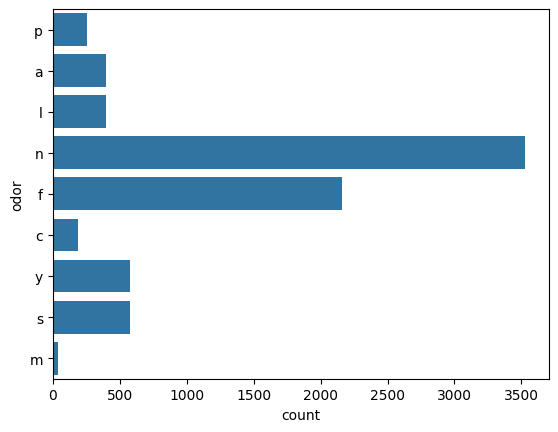

In [29]:
sns.countplot(df['odor'])
plt.show()

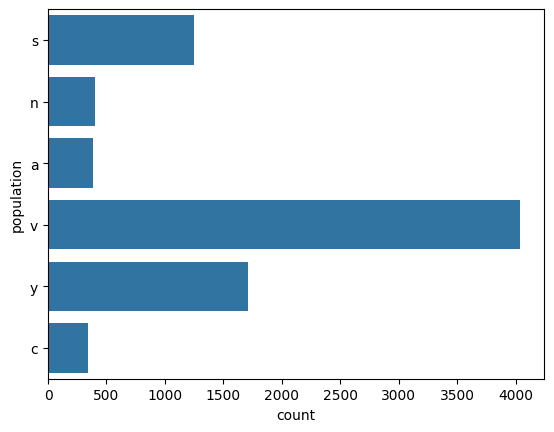

In [30]:
sns.countplot(df['population'])
plt.show()

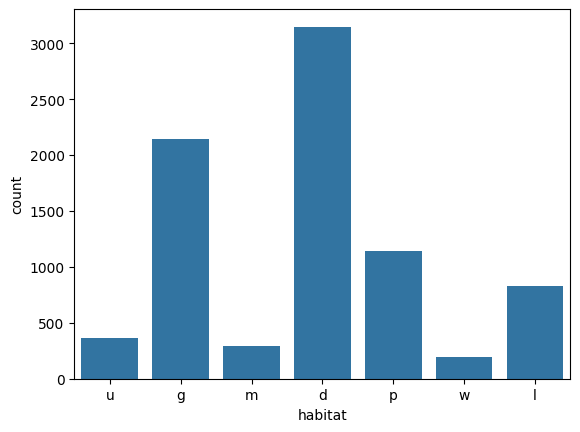

In [31]:
sns.countplot(data=df, x='habitat')
plt.show()

In [58]:
df['stalk-root']

,stalk-root
0,e
1,c
2,c
3,e
4,e
...,...
8119,?
8120,?
8121,?
8122,?


In [59]:
df['stalk-root'] = df['stalk-root'].replace('?', np.nan)

In [61]:
df['stalk-root'] = df['stalk-root'].fillna(df['stalk-root'].mode()[0])

In [63]:
df['class'] = df['class'].map({'p':0, 'e': 1})

In [64]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [67]:
df = pd.get_dummies(df, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True).astype(int)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=('class'))
scaled_data = scaler.fit_transform(features)

In [70]:
scaled_data

array([[-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.02219484,  1.2559503 , -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985,  2.96843295, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [71]:
x = scaled_data
y = df['class']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [77]:
y_pred = log_model.predict(x_test)
precision_score(y_test, y_pred)


1.0

In [78]:
accuracy_score(y_test, y_pred)

1.0

In [79]:
f1_score(y_test, y_pred)

1.0

In [80]:
roc_auc_score(y_test, y_pred)

np.float64(1.0)

In [81]:
log_loss(y_test, y_pred)

2.2204460492503136e-16

In [82]:
confusion_matrix(y_test, y_pred)

array([[782,   0],
       [  0, 843]])

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = tree_model.predict(x_test)
precision_score(y_test, y_pred)

1.0

In [87]:
accuracy_score(y_test, y_pred)

1.0

In [88]:
confusion_matrix(y_test, y_pred)

array([[782,   0],
       [  0, 843]])

In [85]:
f1_score(y_test, y_pred)

1.0

In [89]:
roc_auc_score(y_test, y_pred)

np.float64(1.0)

In [90]:
log_loss(y_test, y_pred)

2.2204460492503136e-16

In [86]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()
rand_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
precision_score(y_test, y_pred)

1.0

In [91]:
f1_score(y_test, y_pred)

1.0

In [92]:
roc_auc_score(y_test, y_pred)

np.float64(1.0)

In [93]:
log_loss(y_test, y_pred)

2.2204460492503136e-16

In [94]:
accuracy_score(y_test, y_pred)

1.0

In [95]:
confusion_matrix(y_test, y_pred)

array([[782,   0],
       [  0, 843]])

In [96]:
import joblib
joblib.dump(rand_model, 'modelt.plk')
joblib.dump(scaler, 'scalert.pkl')

['scalert.pkl']